In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [58]:
imag  = cv2.imread('./breaking-captcha/breaking-captcha/data/samples/2b827.png',0)

In [59]:
threshold = 50
ret, im_bin = cv2.threshold(imag,threshold, 255, cv2.THRESH_BINARY_INV)
imag

array([[192, 192, 192, ..., 251, 251, 251],
       [192, 192, 192, ..., 251, 251, 251],
       [192, 192, 192, ..., 251, 251, 251],
       ...,
       [195, 195, 195, ..., 254, 254, 254],
       [195, 195, 195, ..., 254, 254, 254],
       [195, 195, 195, ..., 254, 254, 254]], dtype=uint8)

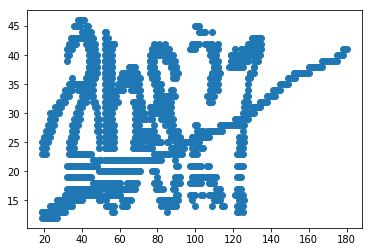

In [60]:
ind = np.nonzero(im_bin)
plt.scatter(ind[1],np.flip(ind[0]))
# plt.plot(ind)
# plt.plot(im_bin)
# cv2.imshow('im',im_bin)

In [61]:
X = np.vstack((ind[1],np.flip(ind[0]))).T
X.shape

(1395, 2)

In [62]:
kmeans = KMeans(n_clusters=5, init=np.array([(i*200/6.0, 25) for i in range(1,6)]))
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.5/dist-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [63]:
np.array([(i*200/6.0, 25) for i in range(1,6)]).shape


(5, 2)

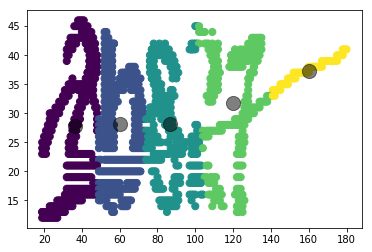

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [41]:
cv2.imshow('t',imag)